In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorism.csv to globalterrorism.csv


In [76]:
terrorism = pd.read_csv('globalterrorism.csv', encoding='ISO-8859-1' )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [78]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [0]:
for i in terrorism.columns:
  if("txt" in i):
    terrorism.drop(i, axis=1, inplace=True)

In [80]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,region,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,corp1,target1,natlty1,targtype2,targsubtype2,corp2,target2,natlty2,targtype3,targsubtype3,...,weaptype3,weapsubtype3,weaptype4,weapsubtype4,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,2,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,0.0,1,0,1,NaN,NaN,14,68.0,NaN,Julio Guzman,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,1,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,0.0,1,0,6,NaN,NaN,7,45.0,Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,5,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,0.0,1,0,1,NaN,NaN,10,54.0,Voice of America,Employee,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,8,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,0.0,1,0,3,NaN,NaN,7,46.0,NaN,U.S. Embassy,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,4,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,0.0,1,0,7,NaN,NaN,7,46.0,NaN,U.S. Consulate,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [81]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 107 entries, eventid to related
dtypes: float64(55), int64(22), object(30)
memory usage: 148.3+ MB


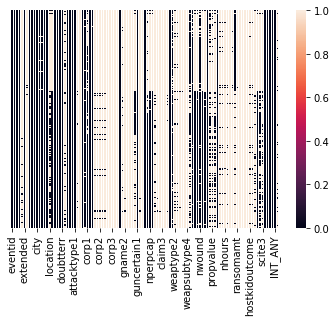

In [82]:
sns.heatmap(terrorism.isnull(),yticklabels=False)

In [83]:
terrorism["nkill"].isna().sum()

10313

In [0]:
for i in terrorism.columns:
  if(terrorism[i].isna().sum()>11000):
      terrorism.drop(i, axis=1, inplace=True)

In [0]:
terrorism.dropna(inplace=True)

In [86]:
terrorism.head()

,eventid,iyear,imonth,iday,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,target1,natlty1,gname,guncertain1,individual,weaptype1,nkill,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1,197000000002,1970,0,0,0,130,1,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,7,45.0,"Nadine Chaval, daughter",21.0,23rd of September Communist League,0.0,0,13,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,5,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,10,54.0,Employee,217.0,Unknown,0.0,0,13,1.0,0,0.0,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,1,Illinois,Cairo,37.005105,-89.176269,1.0,0,1,1,1,0.0,0.0,1,0,2,3,22.0,Cairo Police Headquarters,217.0,Black Nationalists,0.0,0,5,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,3,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,1,1,1,0.0,0.0,0,0,1,3,25.0,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Tupamaros (Uruguay),0.0,0,5,0.0,0,0.0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,1,California,Oakland,37.791927,-122.225906,1.0,0,1,1,1,1.0,0.0,1,0,3,21,107.0,Edes Substation,217.0,Unknown,0.0,0,6,0.0,1,0.0,Hewitt Project,-9,-9,0,-9


In [0]:
terrorism.drop("eventid", axis=1, inplace=True)

In [0]:
#terrorism_final = pd.get_dummies(terrorism[["provstate", "target1", "gname", "dbsource"]] ,drop_first=True)

In [0]:
terrorism_final = terrorism.drop(["provstate", "target1", "gname", "dbsource", "city"], axis=1, inplace=True)

In [90]:
terrorism.head()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,nkill,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1,1970,0,0,0,130,1,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,7,45.0,21.0,0.0,0,13,0.0,0,1.0,0,1,1,1
2,1970,1,0,0,160,5,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,10,54.0,217.0,0.0,0,13,1.0,0,0.0,-9,-9,1,1
5,1970,1,1,0,217,1,37.005105,-89.176269,1.0,0,1,1,1,0.0,0.0,1,0,2,3,22.0,217.0,0.0,0,5,0.0,1,0.0,-9,-9,0,-9
6,1970,1,2,0,218,3,-34.891151,-56.187214,1.0,0,1,1,1,0.0,0.0,0,0,1,3,25.0,218.0,0.0,0,5,0.0,0,0.0,0,0,0,0
7,1970,1,2,0,217,1,37.791927,-122.225906,1.0,0,1,1,1,1.0,0.0,1,0,3,21,107.0,217.0,0.0,0,6,0.0,1,0.0,-9,-9,0,-9


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(terrorism.drop("nkill", axis=1))

terrorism_scaled = pd.DataFrame(scaler.transform(terrorism.drop("nkill", axis=1)), columns = terrorism.columns.drop("nkill"))

In [93]:
terrorism_scaled.head()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,0.0,0.000000,0.000000,0.0,0.126,0.000000,0.567553,0.999997,0.0,0.9,1.0,1.0,1.0,0.9,0.0,1.0,0.0,0.625,0.285714,0.392857,0.017,0.0,0.0,1.000000,0.9,1.0,0.9,1.0,1.0,1.0
1,0.0,0.083333,0.000000,0.0,0.156,0.363636,0.537086,0.999999,1.0,0.9,1.0,1.0,1.0,0.9,0.0,1.0,0.0,0.000,0.428571,0.473214,0.213,0.0,0.0,1.000000,0.9,0.9,0.0,0.0,1.0,1.0
2,0.0,0.083333,0.032258,0.0,0.213,0.000000,0.705540,0.999997,0.0,0.9,1.0,1.0,1.0,0.9,0.0,1.0,0.0,0.125,0.095238,0.187500,0.213,0.0,0.0,0.333333,1.0,0.9,0.0,0.0,0.0,0.0
3,0.0,0.083333,0.064516,0.0,0.214,0.181818,0.142920,0.999997,0.0,0.9,1.0,1.0,1.0,0.9,0.0,0.0,0.0,0.000,0.095238,0.214286,0.214,0.0,0.0,0.333333,0.9,0.9,0.9,0.9,0.0,0.9
4,0.0,0.083333,0.064516,0.0,0.213,0.000000,0.711698,0.999997,0.0,0.9,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.250,0.952381,0.946429,0.213,0.0,0.0,0.416667,1.0,0.9,0.0,0.0,0.0,0.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(terrorism_scaled, terrorism["nkill"], test_size=0.2, random_state=42)

In [0]:
LinRegression = LinearRegression()
LinRegression.fit(X_train, y_train)

predictions_linear = LinRegression.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, predictions_linear))

10.925380011300241

In [98]:
r2_score(y_test, predictions_linear)

0.0422370714280309

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
X_train.keys()

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'weaptype1', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................

In [0]:
predictions_keras = pd.DataFrame(model.predict(X_test).flatten())

In [0]:
sqrt(mean_squared_error(y_test, predictions_keras))

10.920419463599995

In [0]:
r2_score(y_test, predictions_keras)

0.042237071428034345